In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/project1.csv')

In [ ]:
df

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [ ]:
df.columns=['v', 'h','s','m']

In [ ]:
df

,v,h,s,m
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
...,...,...,...,...
333,0.323262,0.909091,0.4,5
334,0.444108,0.181818,1.0,5
335,0.353474,0.454545,1.0,5
336,0.362537,0.727273,1.0,5


In [ ]:
df1 = pd.DataFrame(df)

In [ ]:
df1.isnull().sum().sum()

0

In [ ]:
df1.describe()

,v,h,s,m
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [ ]:
cols=['v', 'h','s','m']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
  df1[i]=le.fit_transform(df1[i])
print(df1.head())

    v  h  s  m
0  78  0  0  0
1  67  2  0  0
2  41  3  0  0
3  20  5  0  0
4  25  6  0  0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
df1 = pd.DataFrame(si.fit_transform(df1), columns=df1.columns)
sc = StandardScaler()
df1 = pd.DataFrame(sc.fit_transform(df1), columns=df1.columns)

In [ ]:
target=df1['m']
input=df1.drop(columns=['m'])
print(input.shape)
print(target.shape)

(338, 3)
(338,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(input, target,test_size=0.25)
print(x_train.shape)
print(x_test.shape)

(253, 3)
(85, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_sc=sc.fit_transform(x_train)
xtest_sc=sc.transform(x_test)

In [ ]:
y_train.unique()

array([ 1.44422642, -0.67202443, -1.37744138,  0.03339252,  0.73880947])

In [ ]:
y_train= le.fit_transform(y_train)
y_test = le.transform(y_test)

# PERCEPTRON

In [ ]:
# penalty = l1
from sklearn.linear_model import Perceptron
p=Perceptron(penalty='l1')
p.fit(xtrain_sc, y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
print("TRAINING")
train_pred=p.predict(xtrain_sc)
print("Training Accuracy:", accuracy_score(train_pred, y_train))
print("Precision Accuracy:", precision_score(y_train,train_pred,average='weighted',zero_division=0))
print("Recall Score:", recall_score(y_train, train_pred,average='weighted'))
print("F1 Score:", f1_score(y_train, train_pred,average='weighted'))
print()
print("TESTING")
test_pred=p.predict(xtest_sc)
print("Testing Accuracy:", accuracy_score(test_pred, y_test))
print("Precision Accuracy:", precision_score(y_test,test_pred,average='weighted',zero_division=0))
print("Recall Score:", recall_score(y_test, test_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, test_pred,average='weighted'))


TRAINING
Training Accuracy: 0.33992094861660077
Precision Accuracy: 0.3804621371971071
Recall Score: 0.33992094861660077
F1 Score: 0.29936288830706714

TESTING
Testing Accuracy: 0.35294117647058826
Precision Accuracy: 0.2796095526266304
Recall Score: 0.35294117647058826
F1 Score: 0.30278648855267287


In [ ]:
# penalty = l2
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(xtrain_sc, y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
print("TRAINING")
train_pred=p.predict(xtrain_sc)
print("Training Accuracy:", accuracy_score(train_pred, y_train))
print("Precision Accuracy:", precision_score(y_train,train_pred,average='weighted',zero_division=0))
print("Recall Score:", recall_score(y_train, train_pred,average='weighted'))
print("F1 Score:", f1_score(y_train, train_pred,average='weighted'))
print()
print("TESTING")
test_pred=p.predict(xtest_sc)
print("Testing Accuracy:", accuracy_score(test_pred, y_test))
print("Precision Accuracy:", precision_score(y_test,test_pred,average='weighted',zero_division=0))
print("Recall Score:", recall_score(y_test, test_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, test_pred,average='weighted'))

TRAINING
Training Accuracy: 0.47035573122529645
Precision Accuracy: 0.3773082717353922
Recall Score: 0.47035573122529645
F1 Score: 0.4181925788022829

TESTING
Testing Accuracy: 0.38823529411764707
Precision Accuracy: 0.31244370954123274
Recall Score: 0.38823529411764707
F1 Score: 0.34084033613445375


In [ ]:
# penalty = elasticnet
from sklearn.linear_model import Perceptron
p.fit(xtrain_sc, y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
print("TRAINING")
train_pred=p.predict(xtrain_sc)
print("Training Accuracy:", accuracy_score(train_pred, y_train))
print("Precision Accuracy:", precision_score(y_train,train_pred,average='weighted',zero_division=0))
print("Recall Score:", recall_score(y_train, train_pred,average='weighted'))
print("F1 Score:", f1_score(y_train, train_pred,average='weighted'))
print()
print("TESTING")
test_pred=p.predict(xtest_sc)
print("Testing Accuracy:", accuracy_score(test_pred, y_test))
print("Precision Accuracy:", precision_score(y_test,test_pred,average='weighted',zero_division=0))
print("Recall Score:", recall_score(y_test, test_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, test_pred,average='weighted'))

TRAINING
Training Accuracy: 0.47035573122529645
Precision Accuracy: 0.3773082717353922
Recall Score: 0.47035573122529645
F1 Score: 0.4181925788022829

TESTING
Testing Accuracy: 0.38823529411764707
Precision Accuracy: 0.31244370954123274
Recall Score: 0.38823529411764707
F1 Score: 0.34084033613445375


In [ ]:
from sklearn.model_selection import GridSearchCV
params = [{'penalty' : ['l1','l2','elasticnet']}]
gs = GridSearchCV(estimator = Perceptron(),param_grid = params)
gs.fit(xtrain_sc,y_train)
print("Best score: " , gs.best_score_)
print("best parameter: ",gs.best_params_)

Best score:  0.40729411764705886
best parameter:  {'penalty': 'l1'}


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain_sc,y_train)
lr_train_pred = lr.predict(xtrain_sc)
lr_test_pred = lr.predict(xtest_sc)
print("TRAINING")
print("Training accuracy : ", accuracy_score(lr_train_pred,y_train))
print("Precision Accuracy:", precision_score(y_train,lr_train_pred,average='weighted'))
print("Recall Score:", recall_score(y_train, lr_train_pred,average='weighted'))
print("F1 Score:", f1_score(y_train, lr_train_pred,average='weighted'))
print()
print("TESTING")
print("Testing accuracy : ",accuracy_score(lr_test_pred, y_test))
print("Precision Accuracy:", precision_score(y_test,lr_test_pred,average='weighted'))
print("Recall Score:", recall_score(y_test, lr_test_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, lr_test_pred,average='weighted'))

TRAINING
Training accuracy :  0.5612648221343873
Precision Accuracy: 0.5218239862026371
Recall Score: 0.5612648221343873
F1 Score: 0.5284801226886858

TESTING
Testing accuracy :  0.4235294117647059
Precision Accuracy: 0.38446455505279037
Recall Score: 0.4235294117647059
F1 Score: 0.38533343161826145


In [ ]:
params = {}
gs = GridSearchCV(lr,params)
gs.fit(xtrain_sc,y_train)
print("Best score: " , gs.best_score_)
print("best parameter: ",gs.best_params_)

Best score:  0.5493333333333333
best parameter:  {}


# SVM

In [ ]:
from sklearn.svm import SVC # c = classifier
svc = SVC()
svc.fit(x_train,y_train)
svc_train_pred = svc.predict(xtrain_sc)
svc_test_pred = svc.predict(xtest_sc)
print("TRAINING")
print("Training accuracy : ", accuracy_score(svc_train_pred,y_train))
print("Precision Accuracy:", precision_score(y_train,svc_train_pred,average='weighted'))
print("Recall Score:", recall_score(y_train,svc_train_pred,average='weighted'))
print("F1 Score:", f1_score(y_train,svc_train_pred,average='weighted'))
print()
print("TESTING")
print("Testing acucracy : ", accuracy_score(svc_test_pred,y_test))
print("Precision Accuracy:", precision_score(y_test,svc_test_pred,average='weighted'))
print("Recall Score:", recall_score(y_test, svc_test_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, svc_test_pred,average='weighted'))

TRAINING
Training accuracy :  0.7193675889328063
Precision Accuracy: 0.7425228211810817
Recall Score: 0.7193675889328063
F1 Score: 0.7014808544474382

TESTING
Testing acucracy :  0.5294117647058824
Precision Accuracy: 0.5452100840336134
Recall Score: 0.5294117647058824
F1 Score: 0.50731679232958


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
params = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
gs = GridSearchCV(estimator=svc, param_grid=params)
gs.fit(xtrain_sc,y_train)
print("Best score: " , gs.best_score_)
print("best parameter: ",gs.best_params_)

Best score:  0.6048627450980393
best parameter:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain_sc,y_train)
knn_train_pred = knn.predict(xtrain_sc)
knn_test_pred = knn.predict(xtest_sc)
print("TRAINING")
print("training accuracy : ",accuracy_score(y_train, knn_train_pred))
print("Precision Accuracy:", precision_score(y_train,knn_train_pred,average='weighted'))
print("Recall Score:", recall_score(y_train,knn_train_pred,average='weighted'))
print("F1 Score:", f1_score(y_train,knn_train_pred,average='weighted'))
print()
print("TESTING")
print("testing accuracy : ", accuracy_score(y_test, knn_test_pred))
print("Precision Accuracy:", precision_score(y_test,knn_test_pred,average='weighted'))
print("Recall Score:", recall_score(y_test, knn_test_pred,average='weighted'))
print("F1 Score:", f1_score(y_test, knn_test_pred,average='weighted'))

TRAINING
training accuracy :  0.758893280632411
Precision Accuracy: 0.7536251852079826
Recall Score: 0.758893280632411
F1 Score: 0.7483656552112512

TESTING
testing accuracy :  0.47058823529411764
Precision Accuracy: 0.4323015726666843
Recall Score: 0.47058823529411764
F1 Score: 0.4241109615838521


In [ ]:
k_param=[{'n_neighbors':[1,2,3]}]
gs=GridSearchCV(estimator=knn, param_grid=k_param)
gs.fit(xtrain_sc, y_train)
print("Best score: " , gs.best_score_)
print("Best parameter: ", gs.best_params_)

Best score:  0.5930196078431373
Best parameter:  {'n_neighbors': 2}


# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain_sc, y_train)
dt_train_results = dt.predict(xtrain_sc)
dt_test_results = dt.predict(xtest_sc)
print("Training accuracy: ", accuracy_score(dt_train_results, y_train))
print("Testing accuracy: ", accuracy_score(dt_test_results, y_test))
#since the difference is more than 20 we'll put criterion as entropy

Training accuracy:  1.0
Testing accuracy:  0.5176470588235295


In [ ]:
params = { 'criterion' : ['gini', 'entropy'],'max_depth' : [6]}
gs = GridSearchCV(estimator=dt, param_grid=params)
gs.fit(xtrain_sc, y_train)
print("Best score: " , gs.best_score_)
print("Best parameter: ", gs.best_params_)

Best score:  0.5574901960784314
Best parameter:  {'criterion': 'gini', 'max_depth': 6}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
dt.fit(xtrain_sc, y_train)
dt_train_results = dt.predict(xtrain_sc)
dt_test_results = dt.predict(xtest_sc)
print("TRAINING")
print("Training accuracy: ", accuracy_score(dt_train_results, y_train))
print("Precision Accuracy:", precision_score(y_train,dt_train_results,average='weighted'))
print("Recall Score:", recall_score(y_train,dt_train_results,average='weighted'))
print("F1 Score:", f1_score(y_train,dt_train_results,average='weighted'))
print()
print("TESTING")
print("Testing accuracy: ", accuracy_score(dt_test_results, y_test))
print("Precision Accuracy:", precision_score(y_test,dt_test_results,average='weighted'))
print("Recall Score:", recall_score(y_test, dt_test_results,average='weighted'))
print("F1 Score:", f1_score(y_test,dt_test_results,average='weighted'))
# the difference is less now

TRAINING
Training accuracy:  0.7154150197628458
Precision Accuracy: 0.7495336954092165
Recall Score: 0.7154150197628458
F1 Score: 0.7224389751459495

TESTING
Testing accuracy:  0.4823529411764706
Precision Accuracy: 0.4795518207282913
Recall Score: 0.4823529411764706
F1 Score: 0.47445378151260503


# BEST SCORE GRAPH

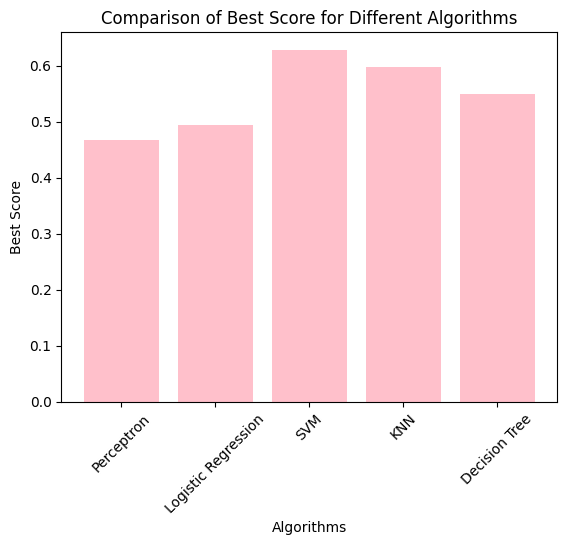

In [ ]:
alg = ['Perceptron', 'Logistic Regression', 'SVM','KNN','Decision Tree']
bs = [0.46690196078431373,0.4939607843137255,0.6282352941176471,0.5967058823529412,0.5491764705882354]
plt.bar(alg, bs, color='pink')
plt.xlabel('Algorithms')
plt.ylabel('Best Score')
plt.xticks(r, alg, rotation=45)
plt.title('Comparison of Best Score for Different Algorithms')
plt.show()

# TRAINING RESULTS GRAPH

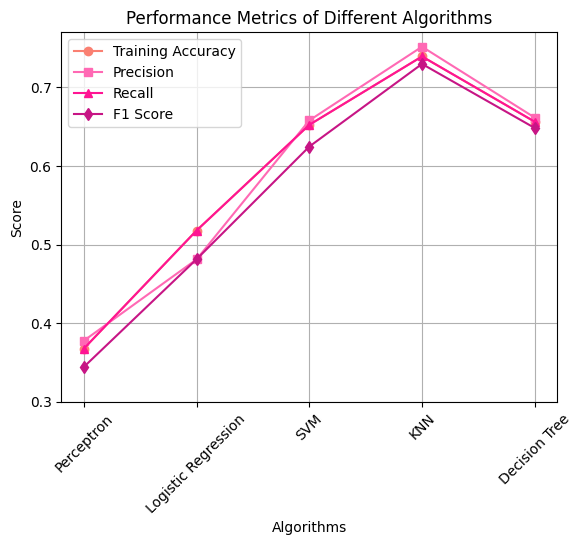

In [ ]:
tr = [0.3675889328063241,0.5177865612648221,0.6521739130434783,0.7391304347826086,0.6561264822134387]
pr = [0.37764162575326915,0.48109970276543934,0.657764505229124,0.7515386416333287,0.6613542530653105]
rs = [0.3675889328063241, 0.5177865612648221,0.6521739130434783,0.7391304347826086,0.6561264822134387]
f1 = [0.34428589570024876,0.4812318527523994,0.6244910554813298,0.7296296694178803,0.6481631791086315]
alg = ['Perceptron', 'Logistic Regression', 'SVM','KNN','Decision Tree']

r = np.arange(len(alg))
plt.figure()

plt.plot(r, tr, marker='o', label='Training Accuracy',color = 'salmon')
plt.plot(r, pr, marker='s', label='Precision',color = 'hotpink')
plt.plot(r, rs, marker='^', label='Recall',color = 'deeppink')
plt.plot(r, f1, marker='d', label='F1 Score',color = 'mediumvioletred')

plt.xticks(r, alg, rotation=45)

plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Algorithms')
plt.legend()
plt.ylim(0.3, 0.77)
plt.grid(True)
plt.show()

# TESTING RESULTS GRAPH

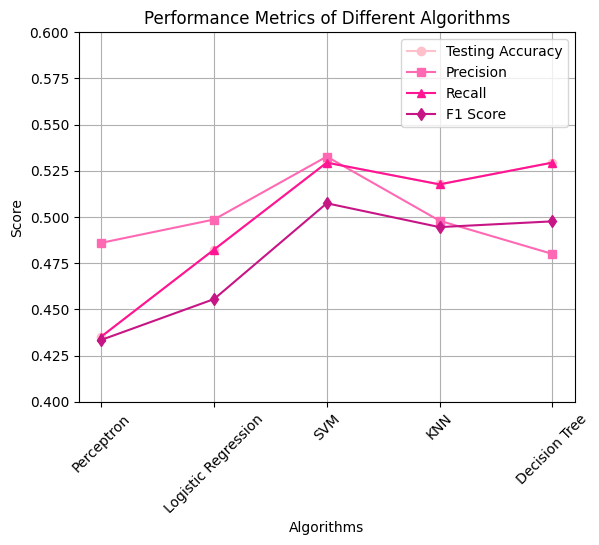

In [ ]:
tr = [0.43529411764705883,0.4823529411764706,0.5294117647058824,0.5176470588235295,0.5294117647058824]
pr = [0.4860130718954248,0.4986309369725711,0.5326797385620915,0.49798761609907116,0.4800150829562595]
rs = [0.43529411764705883,0.4823529411764706,0.5294117647058824,0.5176470588235295,0.5294117647058824]
f1 = [0.4334865726346457,0.4555699692333496,0.50741408307389,0.4945221224645358,0.49762874071584773]
alg = ['Perceptron', 'Logistic Regression', 'SVM','KNN','Decision Tree']

r = np.arange(len(alg))
plt.figure()

plt.plot(r, tr, marker='o', label='Testing Accuracy',color = 'pink')
plt.plot(r, pr, marker='s', label='Precision',color = 'hotpink')
plt.plot(r, rs, marker='^', label='Recall',color = 'deeppink')
plt.plot(r, f1, marker='d', label='F1 Score',color = 'mediumvioletred')

plt.xticks(r, alg, rotation=45)

plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Algorithms')
plt.legend()
plt.ylim(0.4, 0.6)
plt.grid(True)
plt.show()

# CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
algorithms = [p,lr,svc,knn,dt]
for algorithm in algorithms:
    scores = cross_val_score(algorithm, xtrain_sc, y_train, cv=kf, scoring='accuracy')
    print(f"{algorithm.__class__.__name__}: Average Accuracy: {scores.mean()}, Std: {scores.std()}")

Perceptron: Average Accuracy: 0.39866666666666667, Std: 0.08859051807247262
LogisticRegression: Average Accuracy: 0.49011764705882344, Std: 0.03162292249651035
SVC: Average Accuracy: 0.5176470588235293, Std: 0.04697705314004288
KNeighborsClassifier: Average Accuracy: 0.5495686274509805, Std: 0.04553723058633759
DecisionTreeClassifier: Average Accuracy: 0.5375686274509804, Std: 0.038019724134963566


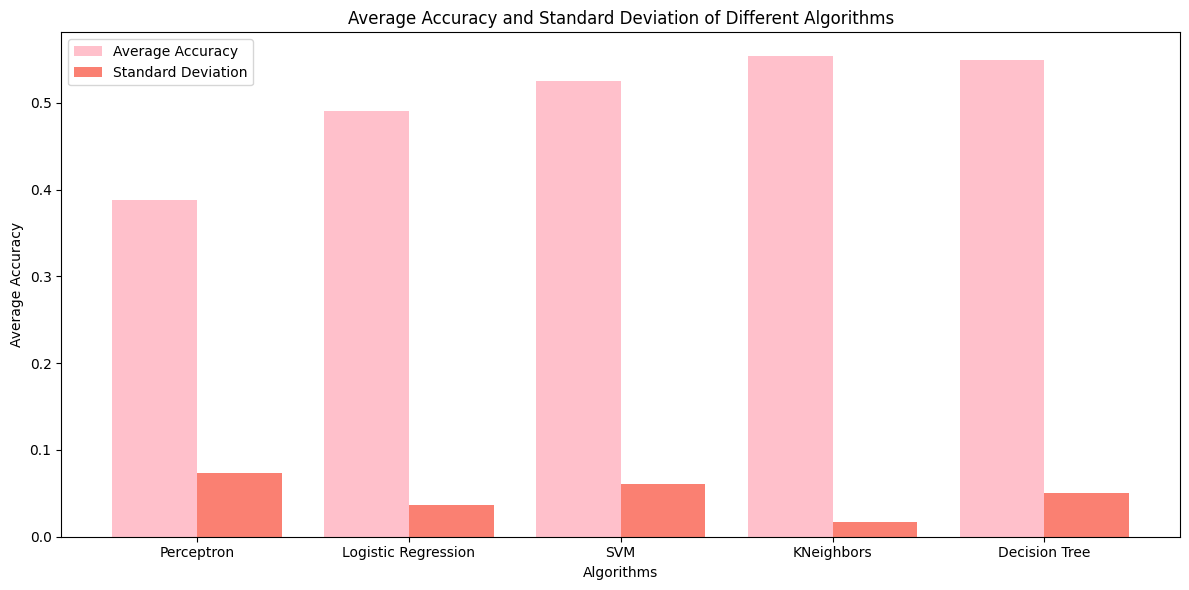

In [ ]:

alg = ['Perceptron', 'Logistic Regression', 'SVM', 'KNeighbors', 'Decision Tree']
avg = [0.387686274509804, 0.49035294117647055, 0.5255686274509804, 0.5534901960784314, 0.5489411764705883]
std = [0.07353651207548265, 0.03689327063186708, 0.061322299794885335, 0.016522048461125736, 0.050098188864363416]


r = np.arange(len(alg))
barw = 0.4
plt.figure(figsize=(12, 6))
plt.bar(r, avg, color='pink', width=barw, label='Average Accuracy')
plt.bar(r + barw, std, color='salmon', width=barw,label='Standard Deviation')

plt.xticks([r + barw/2 for r in range(len(alg))], alg)

plt.ylabel('Average Accuracy')
plt.xlabel('Algorithms')
plt.title('Average Accuracy and Standard Deviation of Different Algorithms')
plt.legend()
plt.tight_layout()
plt.show()